# Author : Shreya Chakraborty
## GRIP @ The Sparks Foundation

# Data Science and Business Analytics Intern

### Batch : December 2023

### Task 1: PREDICTION USING SUPERVISED ML
##### Predicting the percentage of an student based on the no. of their study hours. This is a simple linear regression model which involves just two variables. 

In [1]:
#Importing all required libraries:
import pandas as pd
import numpy as np  
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#it allows the output of plotting commands to be displayed directly below the code cell that produced it, within the Jupyter Notebook interface.


In [2]:
#Importing data from an external link:
url= "http://bit.ly/w-data"
data_df= pd.read_csv(url)
print(data_df)
print("Data is successfully imported")

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86
Data is successfully imported


##### Exploratory Data Analysis

In [3]:
data_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
data_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data_df.head(-5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
print(data_df.shape)
print("\nThis dataset has 25 rows and 2 columns")

(25, 2)

This dataset has 25 rows and 2 columns


In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [8]:
data_df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [9]:
data_df.isnull().sum()

Hours     0
Scores    0
dtype: int64

###### There is no null value included in our dataset

#### Data Visualization
##### Now we will plot our data points on 2-D graph to eyeball our dataset and check if we can manually find any relationship between the data.

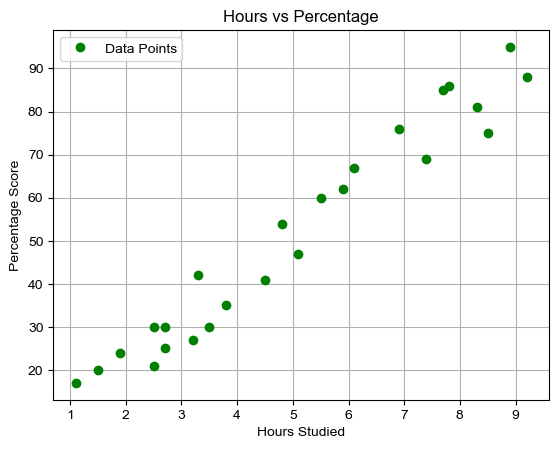

In [10]:
# Plotting the distribution of scores
data_df.plot(x='Hours', y='Scores', style='o',color='green', label='Data Points')
sns.set(style='whitegrid')
plt.grid(True)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

###### So there is a positive linear relationship between the dependent and the independent variables. If the study hours increases then that student's percentage score will also increase.

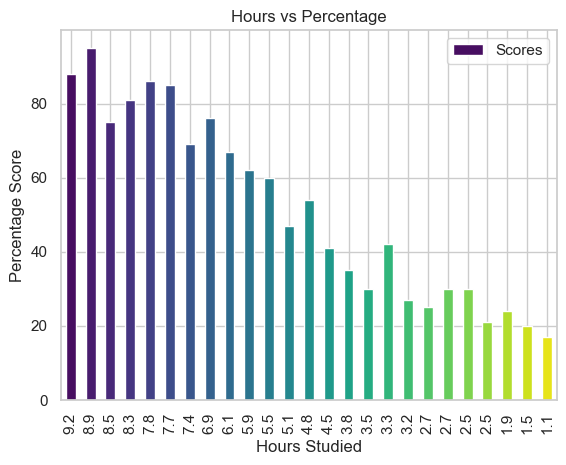

In [11]:
data_df.sort_values(['Hours'],axis=0, ascending=[False],inplace=True)
colors = sns.color_palette("viridis", len(data_df))

data_df.plot.bar(x="Hours", y='Scores', color=colors)

plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')

plt.show()

<Axes: >

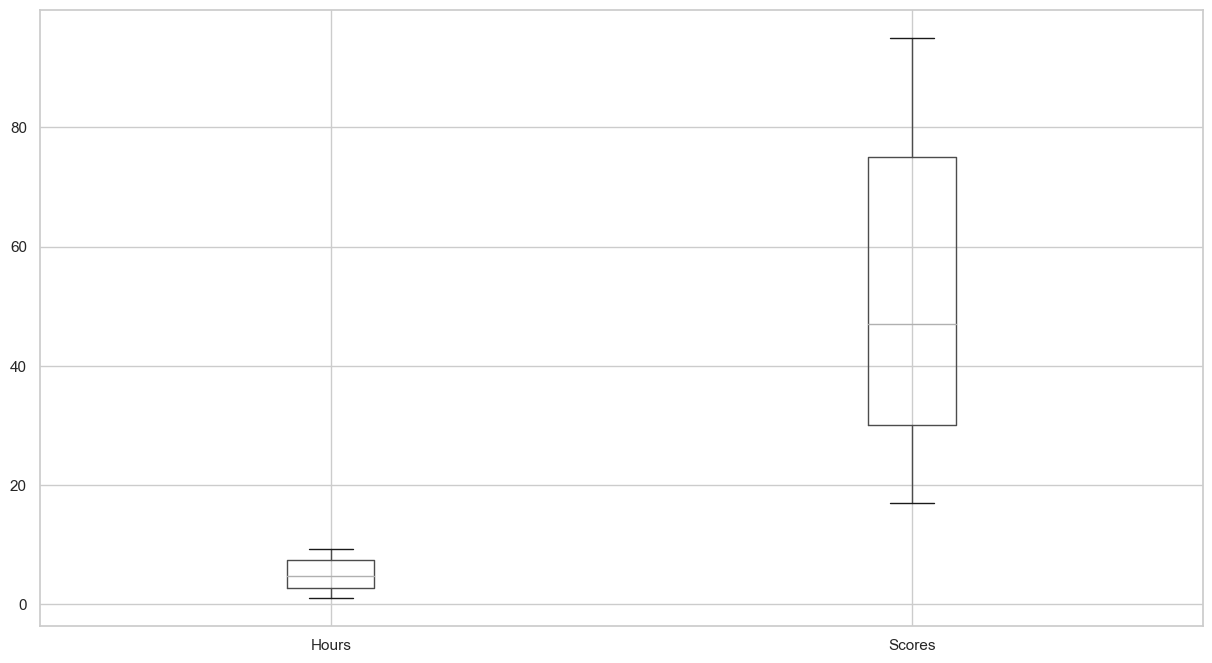

In [17]:
#Checking outliers using boxplot
data_df.boxplot(figsize=(15,8))

In [18]:
print("There is no outliers in our dataset")

There is no outliers in our dataset


#### Data Analysis and modelling

In [19]:
x = data_df.iloc[:, :-1].values  
y = data_df.iloc[:, 1].values  
#The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [20]:
#Then we have our attributes and labels, the next step is to split this data into training and test sets.
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.3, random_state=0)

The code uses the train_test_split function from the sklearn.model_selection module to split the dataset into training and testing sets. The input features are denoted as X, and the corresponding labels are denoted as y. The test_size parameter is set to 0.2, indicating that 20% of the data will be reserved for testing, while the remaining 80% will be used for training. The random_state parameter is set to 0, ensuring reproducibility by fixing the random seed. After the execution of this code, the variables X_train, X_test, y_train, and y_test will contain the training and testing subsets of the input features and labels, respectively. This separation is crucial for assessing the performance of machine learning models, as it allows training on one portion of the data and evaluating on another to gauge generalization capabilities.

In [21]:
#We have split our data into training and testing sets, and now is finally the time to train our algorithm.
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x_train,y_train) #fitted the linear regression model and plotted in a graphical representation


LinearRegression()

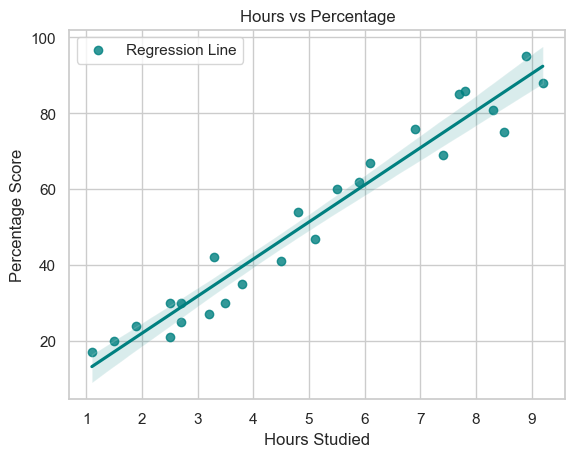

In [22]:
sns.regplot(x='Hours', y='Scores', data=data_df, scatter=True, color='teal', label='Regression Line')

plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  

plt.legend()
plt.show()

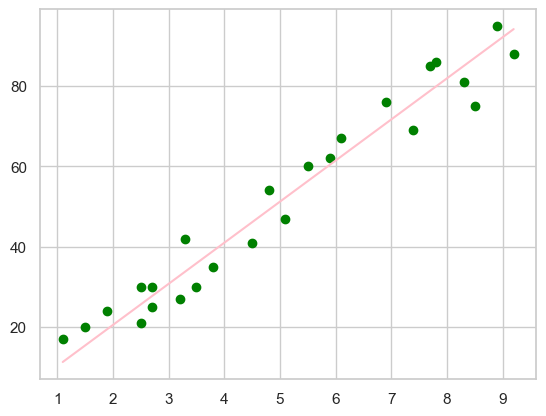

In [23]:
regression_line = model.coef_*x+model.intercept_

# Scatter plot and regression line
plt.plot(x, y, 'o',color='green')
plt.plot(x, regression_line,color='pink');
plt.show()

##### Testing and Prediction


In [24]:
print(x_test) # Testing data - In Hours


[[7.7]
 [8.5]
 [2.7]
 [3.3]
 [5.1]
 [1.9]
 [3.2]
 [1.1]]


In [25]:
y_predicted = model.predict(x_test) # Predicting the scores
print(y_predicted)

[78.85865425 87.05501481 27.63140076 33.77867118 52.22048244 19.4350402
 32.75412611 11.23867964]


In [26]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted}) 
print("Comparison between Actual & Predicted Scores")
df

Comparison between Actual & Predicted Scores


,Actual,Predicted
0,85,78.858654
1,75,87.055015
2,30,27.631401
3,42,33.778671
4,47,52.220482
5,24,19.435040
6,27,32.754126
7,17,11.238680


In [28]:
#Model accuracy rate
Accuracy_rate= model.score(x_train,y_train)
Accuracy_rate

0.9625676590236474

In [29]:
hours = 9.25
test = np.array([hours])  # Create a 1D array
test = test.reshape(-1, 1)  # Reshape to a 2D array with one column

own_pred = model.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))
print("The predicted score if a student studies for 9.25 hrs/day is: ",own_pred)

No of Hours = 9.25
Predicted Score = 94.73910283537876
The predicted score if a student studies for 9.25 hrs/day is:  [94.73910284]


##### The predicted score if a student studies for 9.25 hrs/day is:94.07

#### Evaluating the model

In [30]:
from sklearn import metrics  
import math
MSE = metrics.mean_squared_error(y_test, y_predicted)
RMSE = math.sqrt(MSE)
MAE = metrics.mean_absolute_error(y_test, y_predicted)

print("The Mean Squared Error is:", MSE)
print("The Root Mean Squared Error is:", RMSE)
print('Mean Absolute Error:', MAE)

The Mean Squared Error is: 46.329386745762555
The Root Mean Squared Error is: 6.806569381543286
Mean Absolute Error: 6.260897164621241


In [31]:
print("R squared value is: ",metrics.r2_score(y_test,y_predicted))

R squared value is:  0.9131162788487472


#### A higher R-squared value suggests a better fit of the model to the data. In this case, about 91.31% of the variability in the target variable is accounted for by the independent variables included in our model.